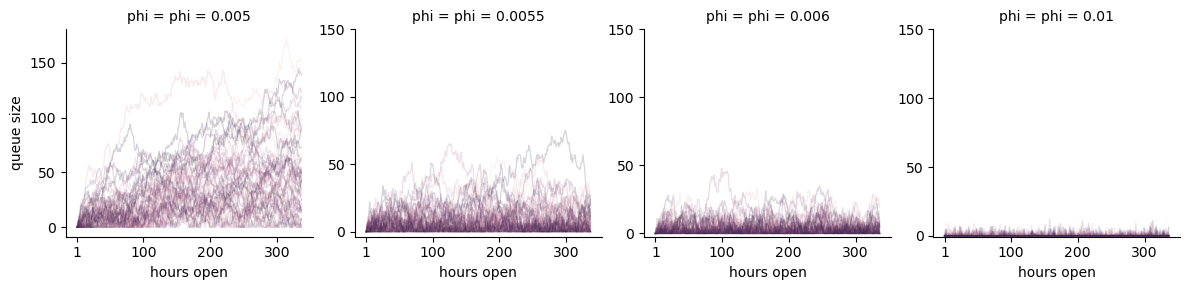

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1234)

T = 14 * 24
run = 1
queue = np.empty(T)
queue[:] = np.nan

queue_df = pd.DataFrame({'t': [], 'queue': [], 'run': [], 'phi': []})

for m in range(50):
    for phi in [0.005, 0.0055, 0.006, 0.01]:
        queue[0] = 0
        for t in range(1, T):
            arrived = np.random.binomial(n=1000, p=0.005, size=1)
            served = np.random.binomial(n=1000, p=phi, size=1)
            queue[t] = max(0, queue[t-1] + arrived - served)
        df = pd.DataFrame({
            't': range(1, T+1),
            'queue': queue,
            'run': np.repeat(run, T),
            'phi': np.repeat(f'phi = {phi}', T)
        })
        queue_df = pd.concat([queue_df, df])
        run += 1

grid = sns.FacetGrid(queue_df, col='phi', sharey=False)
grid.map(sns.lineplot, 't', 'queue', 'run', alpha=0.2, linewidth=0.9,color='blue')
grid.set(xticks=[1, 100, 200, 300], yticks=[0, 50, 100, 150])
grid.set_axis_labels(x_var='hours open', y_var='queue size')
plt.show()
